# In this Notebook we are going to write the classification problems
There are few types of classification:

1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

In [1]:
# Createing data to view and fit

from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000

# Create circles
X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 42)

In [2]:
# Check the features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [68]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
#  Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0],
                        "X1" : X[:, 1],
                        "label" : y })

In [5]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


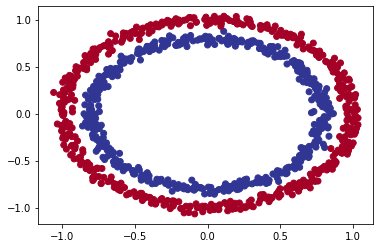

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c= y, cmap = plt.cm.RdYlBu)

# Input and Output shape

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [10]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [11]:
tf.random.set_seed(42)
#  Create a model using Sequential API
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])

# Fit the model
model1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
# Lets Try improving our model by traning our model
model1.fit(X, y, epochs = 200, verbose = 0)
model1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
# since we are working on binary classification problem and the accuracy is about 50 percenatge so we can incvrease it by increasing the number of layers
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])
model2.fit(X, y, epochs = 100, verbose = 0)

In [14]:
#  evaluatethe model
model2.evaluate (X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]


# We need to improve the model still more:
1. Create a model - add more layers
                  - increase number of hidden units within the layers.
                  -Change the Activation function
2. Compiling the model
                  - Use of different Optimizers
                  - Chnage the hyperparamets of the Oprimizers
3. Fitting the model 
                  - fit our model for more epochs 

In [15]:
# Increase the hidden units and add extra layers
tf.random.set_seed(42)
# 1. creating model 
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile
model3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

model3.fit(X,y,epochs = 100, verbose = 0)

In [16]:
model3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.5040


[0.17511941492557526, 0.5040000081062317]

In [17]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Make the plot prediction function:
import numpy as np

def plot_decision_boundary(model, X, y):

  """Plot the decision boundary created by model predicting on X
  """
  # Define the axis boundary of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min()- 0.1, X[:,0].max() + 0.1 # we add and subtract 0.1 to get the margin in the mean and value so that we can see it
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # craete X values(we re gong the make prediction on it)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Mke teh prediction 
  y_pred = model.predict(x_in)

  #  Check if the function i s multicalss
  if len(y_pred[0]) > 1:
    print("performing a Multiclass classifiacation")
    # we have to reshape our prediction to get then ready fpr plot
    y_pred = np.argmax(y_pred, axis =1).reshape(xx.shape)

  else:
    print("doing Binary class classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s= 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



In [20]:
  x_min, x_max = X[:, 0].min()- 0.1, X[:,0].max() + 0.1 # we add and subtract 0.1 to get the margin in the mean and value so that we can see it
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  x_min, x_max, y_min,y_max
  

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

doing Binary class classification


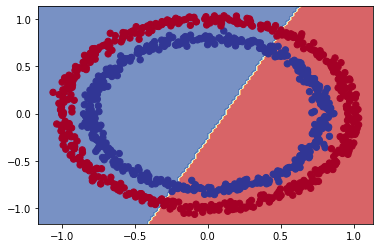

In [21]:
plot_decision_boundary(model3, X, y);

In [22]:
x_min, x_max = X[:, 0].min()- 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
x_min,x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [23]:
# As we can see the model we have created is using the solution as we are working on the regression problem

# so let us try if our model 3 will work on a regrression problem
tf.random.set_seed(42)

# create a regression datasets

X_regression = tf.range(0, 1000, 5)

y_regression = tf.range(100, 1100, 5)      # the model to learn is y = x + 100

In [24]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Split our regression data in train and test set
tf.random.set_seed(42)
X_reg_train = X_regression[:150]

X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]

y_reg_test = y_regression[150:]

# Make the model ( in model we have used a classification compile so we have to make it again)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss = ["mae"],
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])
model_3.fit(tf.expand_dims(X_reg_train, axis =1 ), y_reg_train, epochs = 100,verbose = 0)

In [26]:
# Make predictions 
y_pred = model_3.predict(X_reg_test)
                         

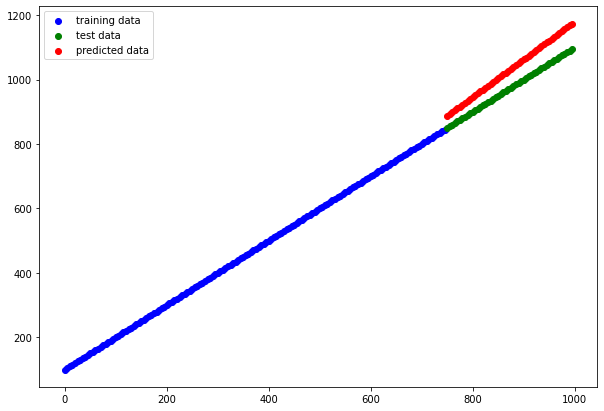

In [27]:
# Plot the model regression
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c = 'b', label ="training data")
plt.scatter(X_reg_test,y_reg_test, c= 'g', label = "test data")
plt.scatter(X_reg_test, y_pred, c='r', label = "predicted data")
plt.legend();

## The difference between the data of regression and classification is concept of Non Linearity 

In [28]:
#  we can use the activation function that is relu
#  set the random seed 
tf.random.set_seed(42)

# model
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

model4.compile(loss = ["binary_crossentropy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ['accuracy'])

history = model4.fit(X, y, epochs = 100,verbose = 1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [29]:
model4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

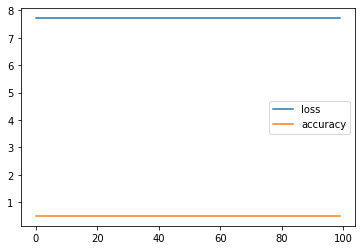

In [30]:
pd.DataFrame(history.history).plot()

doing Binary class classification


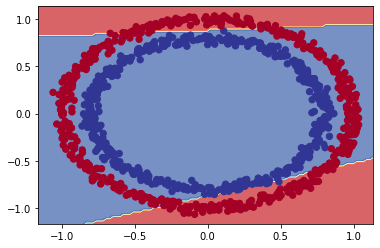

In [31]:
plot_decision_boundary(model4, X, y)

In [32]:
#  we can use the activation function that is relu
#  set the random seed 
tf.random.set_seed(42)

# model
model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation ='sigmoid')
])

model5.compile(loss = ["binary_crossentropy"],
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ['accuracy'])

history = model5.fit(X, y, epochs = 100,verbose = 1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [33]:
model5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

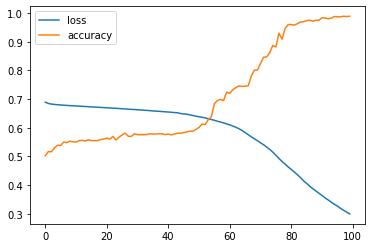

In [34]:
pd.DataFrame(history.history).plot()

doing Binary class classification


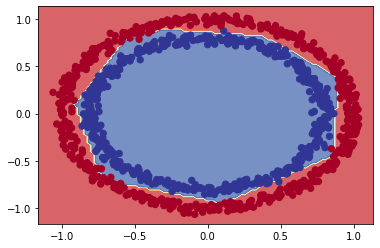

In [35]:
plot_decision_boundary(model5, X, y)

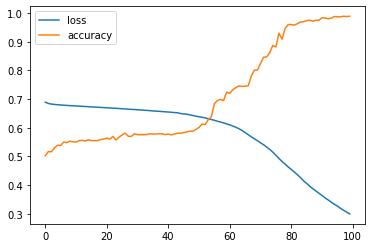

In [36]:
## Plot the loss curve
pd.DataFrame(history.history).plot()

# Method to find the idea training rate

to find the ideal lr , we are going to iuse the following steps:
1. A lerning rate **callback**- you can think claaback as extra functionality , you can add to your model *while* training 
2.Another model
3.A Modified loss curve plot.(loss vs lr value to see where the loss decreased the most)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [38]:
# Creatre a model
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model(passing the lr_scheduler callback)

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks =[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [39]:
model_9.evaluate(X_test, y_test)
h = pd.DataFrame(history_9.history)
h

7/7 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5100


,loss,accuracy,lr
0,0.692150,0.50250,0.000100
1,0.691539,0.50000,0.000112
2,0.690927,0.50000,0.000126
3,0.690241,0.50125,0.000141
4,0.689572,0.50625,0.000158
...,...,...,...
95,0.840930,0.50250,5.623413
96,0.780879,0.51500,6.309574
97,0.730232,0.46000,7.079458
98,0.827679,0.50750,7.943282


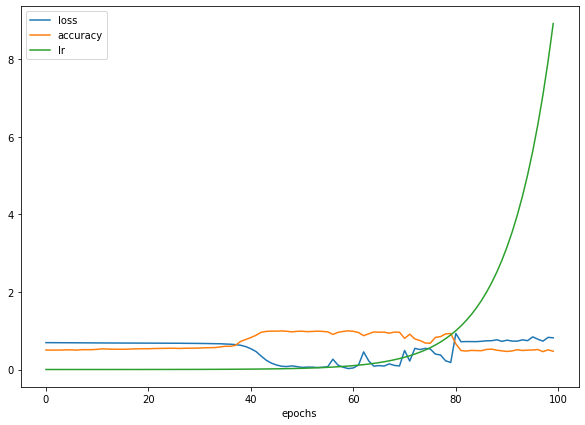

In [40]:
#  Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

In [41]:
# plot learning rate and loss
lrs = 1e-4 *(10**(tf.range(100)/20))
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs loss curve')

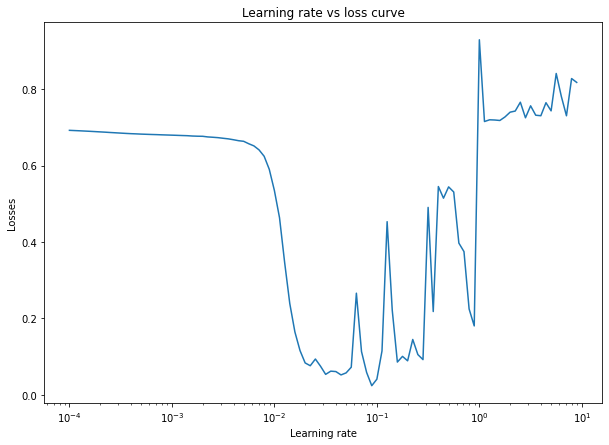

In [42]:
# We can use this method also:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Losses")
plt.title("Learning rate vs loss curve")

Text(0.5, 1.0, 'Learning rate vs loss curve')

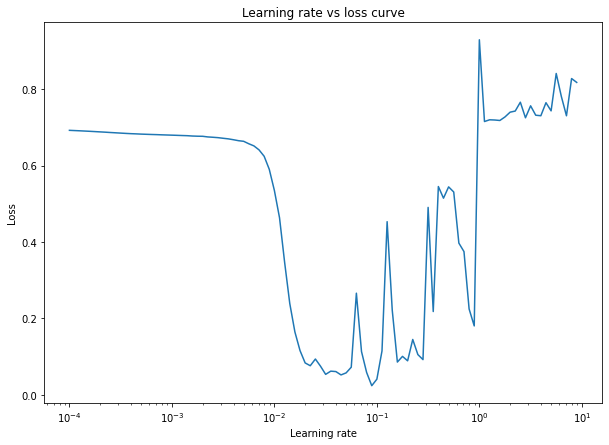

In [43]:
plt.figure(figsize=(10,7))
plt.semilogx(h['lr'], h['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title("Learning rate vs loss curve")

In [44]:
1e-2

0.01

## as we can see the learning rate is decreasing sharply in range of 0.01 but we have by chance used that already so we have to use the lr which isin between lowest loss and where curve is still falling asy in this case (0.027)

In [46]:
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr =0.027),
    metrics = "accuracy"
)

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 1ms/step - loss: 0.6840 - accuracy: 0.5337
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5838
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6700
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.7675
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7600
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.9150
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9325
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9700
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9887
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9925
Epoch 11/20
25/25 [===========

In [47]:
# evaluate model10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9950


[0.030089691281318665, 0.9950000047683716]

In [48]:
model5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 1.0000


[0.28150254487991333, 1.0]

doing Binary class classification
doing Binary class classification


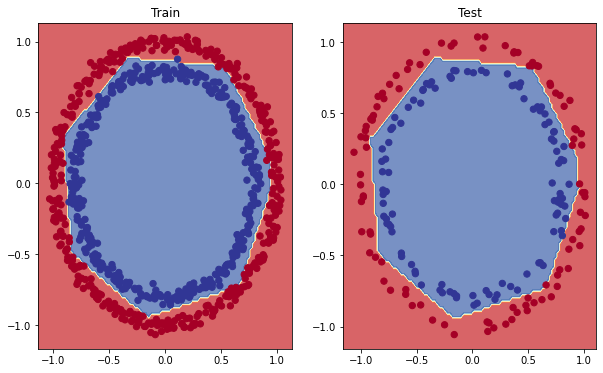

In [49]:
# Plot decision boundaries for model10

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,
                       X = X_train,
                       y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,
                       X = X_test,
                       y = y_test)
plt.show()

In [50]:
loss, accuracy = model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9950


In [51]:
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}% ") 

Model loss on the test set : 0.030089691281318665
Model accuracy on the test set : 99.50% 


## How to create a **confusion matrix**

In [52]:
from sklearn.metrics import confusion_matrix
y_pred = model_10.predict(X_test)
confusion_matrix(y_test, y_pred)

ValueError: ignored

In [53]:
# lets analyze the predict and test set
y_pred, y_test

(array([[9.99968052e-01],
        [9.97560918e-01],
        [1.26065910e-02],
        [9.99857903e-01],
        [5.54701686e-03],
        [1.08241230e-01],
        [9.99998033e-01],
        [9.88007069e-01],
        [9.99947608e-01],
        [5.21510839e-04],
        [9.99765873e-01],
        [3.71560454e-03],
        [9.99314308e-01],
        [9.91393268e-01],
        [9.99467611e-01],
        [9.93175268e-01],
        [9.98460531e-01],
        [9.84351516e-01],
        [9.48633254e-01],
        [9.99890089e-01],
        [9.70870256e-03],
        [9.93965626e-01],
        [9.97563899e-01],
        [9.99962926e-01],
        [4.18151617e-01],
        [9.96522784e-01],
        [1.59502029e-03],
        [1.96486712e-04],
        [1.35883689e-03],
        [9.99119639e-01],
        [9.28248286e-01],
        [2.10672617e-04],
        [9.94506538e-01],
        [3.20931167e-06],
        [8.74969482e-01],
        [2.63569655e-06],
        [4.17256355e-03],
        [5.56492805e-03],
        [2.3

In [54]:
# so the model is predicted the probabilistic value instead of the integer value so we can round of the values
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [55]:
confusion_matrix(y_test, tf.round(y_pred))

array([[ 97,   1],
       [  0, 102]])

In [56]:
# make the function so that we can plot the confusion matrix


def plot_confusion_matirx(true_labels= y_test,
                          predicted_labels = y_pred):
  # Make the confusion the matrix 

  #  This code is derive from the plotconfusion matrix code

  import itertools

  # Create the confusion matrix

  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis =1).T # Normalize the confusion matrix
  n_classes = cm.shape[0]

  # Lets plot
  fig, ax = plt.subplots(figsize=(10,10))
  # create a mtrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # create a class
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # label the axis
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set xaxis labels at bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # adjust the label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)
  # set threshold
  threshold = (cm.max() +cm.min())/2.
  # plot the test each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] >threshold else "black",
            size = 15) 

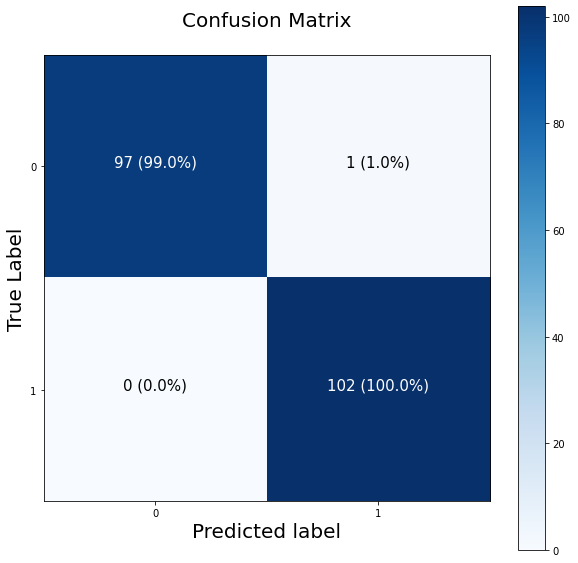

In [57]:
plot_confusion_matirx(y_test, y_pred)